In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# **EXPLORATORY DATA ANALYSIS (VISUALIZATION)**

A description of the data given along side visualization to possible relationships and correllation within the features of the data.

* Data frame information to review data types, missing data, and number of rows

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* The sescribe function to review the distribution of numberical data

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Treat missing Data**

In [6]:
train_df['Age'].fillna(int(train_df['Age'].mean()), inplace=True)
test_df['Age'].fillna(int(test_df['Age'].mean()), inplace=True)
test_df['Fare'].fillna(int(test_df['Fare'].mean()), inplace=True)

train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [7]:
#Import needed resource

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### 1. Review correlation within features

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.033632 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.067814 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.334974  0.083081  0.018443   
Age             0.033632 -0.067814 -0.334974  1.000000 -0.232978 -0.176486   
SibSp          -0.057527 -0.035322  0.083081 -0.232978  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.176486  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.093706  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.093706  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


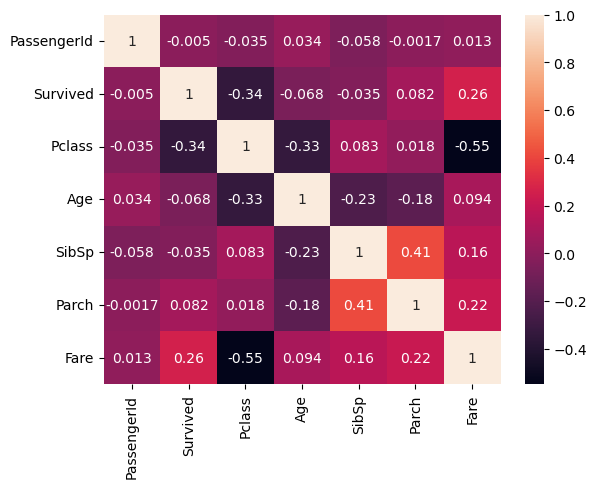

In [8]:
print(train_df.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(train_df.corr(), annot=True)
  
# displaying heatmap
plt.show()

## Graphically explore the relationship within features and the target variable (Survival)

In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


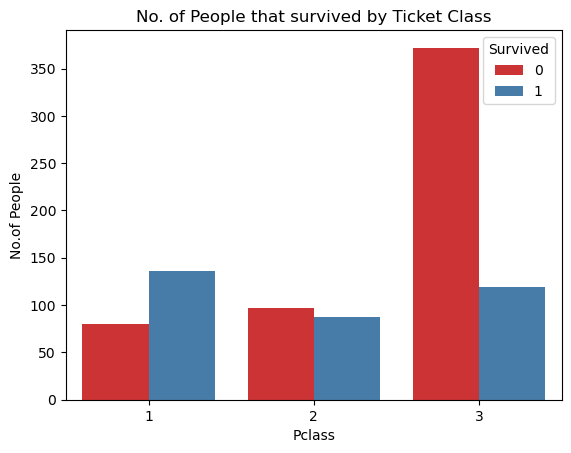

In [10]:
axis = sns.countplot(x = "Pclass", hue = "Survived", palette = "Set1", data = train_df )
axis.set(title = "No. of People that survived by Ticket Class", xlabel = "Pclass",ylabel = "No.of People")
plt.show()

This reveals that individuals with 1st class ticket had a 62% chance of survival. \
The 3rd class tickets had the lowest chance of survival 24% per the number of individuals who purchased the tickets.

In [11]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


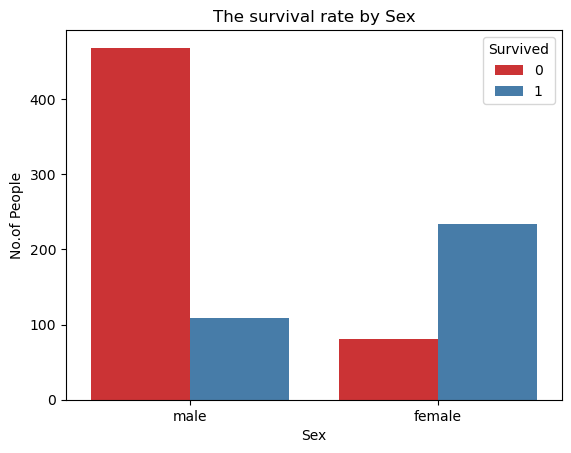

In [12]:
axis = sns.countplot(x = "Sex", hue = "Survived", palette = "Set1", data = train_df )
axis.set(title = "The survival rate by Sex", xlabel = "Sex",ylabel = "No.of People")
plt.show()

A higher percentage of the females survived compared to males.

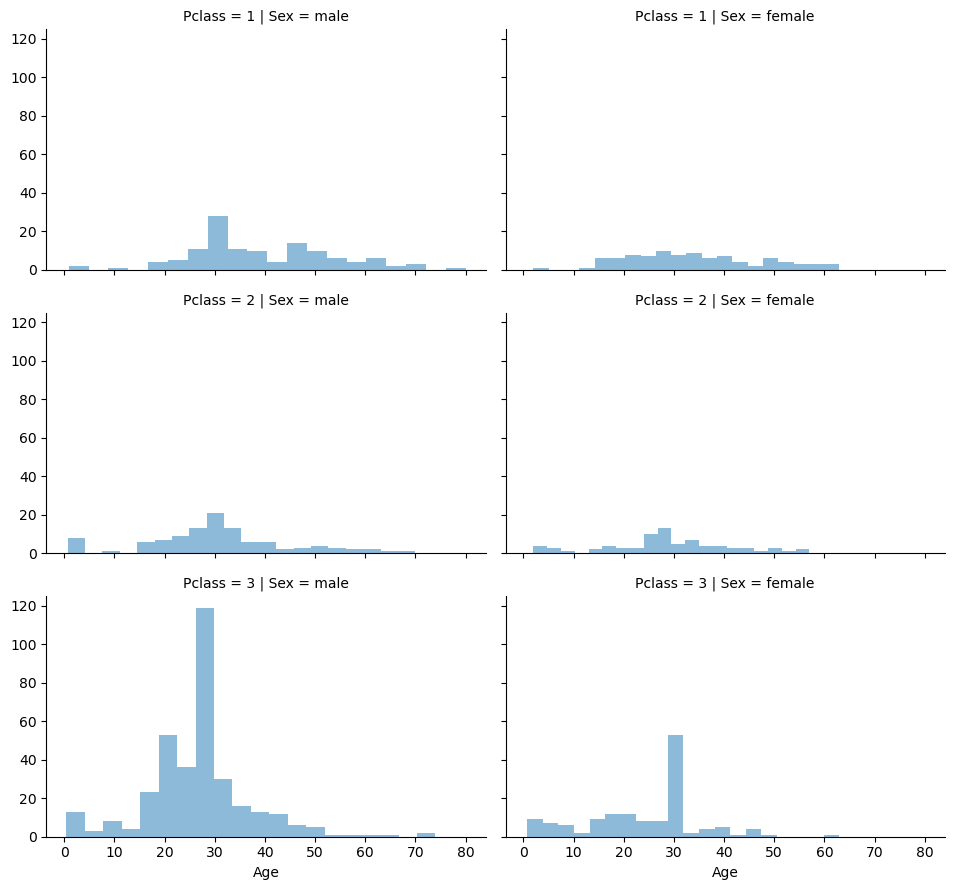

In [13]:
grid = sns.FacetGrid(train_df, col='Sex',row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

A review from the chart above showed a wide spread in the distribution of age in the 1st class section of the ship. \
The age ranged from 25 to 70 years of age with the distribution to non below 15.\
The 3rd class section had a high distribution of males just under 30 years of age.\
It also revelas that the 3rd class had the highest number of females beloow the age of 10 years.

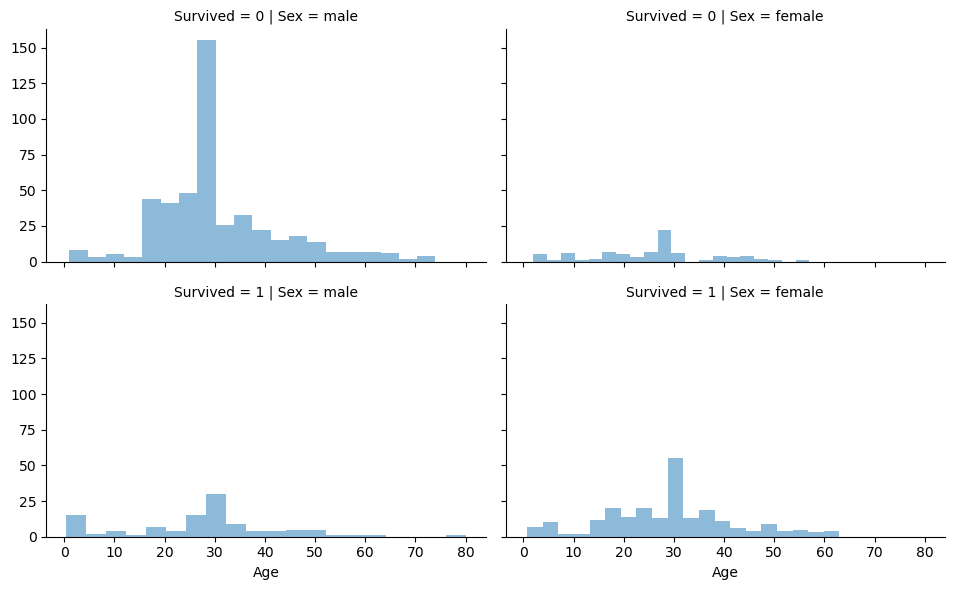

In [14]:
grid = sns.FacetGrid(train_df, col='Sex',row= "Survived", aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

The chart above shows the age distribution by gender and their survival rate.


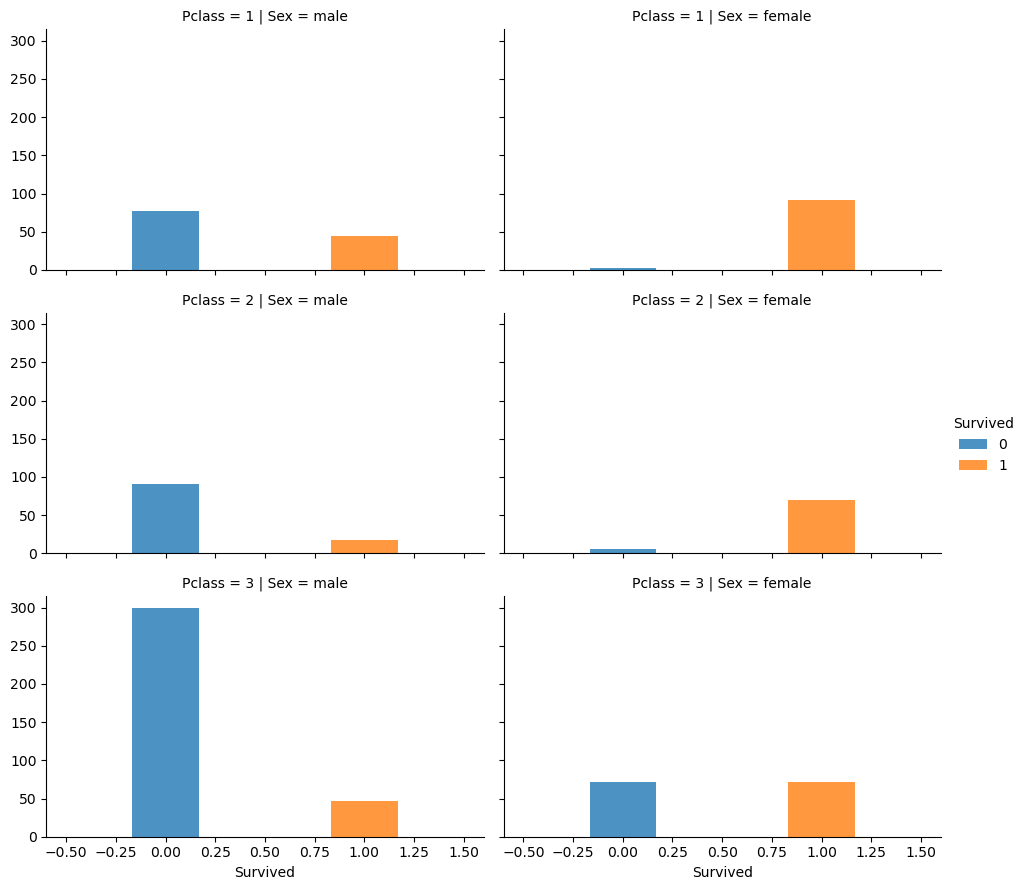

In [15]:
grid = sns.FacetGrid(train_df, col='Sex',row='Pclass', hue='Survived', aspect=1.6)
grid.map(plt.hist, 'Survived', alpha=.8, bins=3)
grid.add_legend()

Survival rate of males increased with an increase in their class.\
Almost all women in the First class section survived with an even distribution of females in th 3rd class survived.

In [16]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


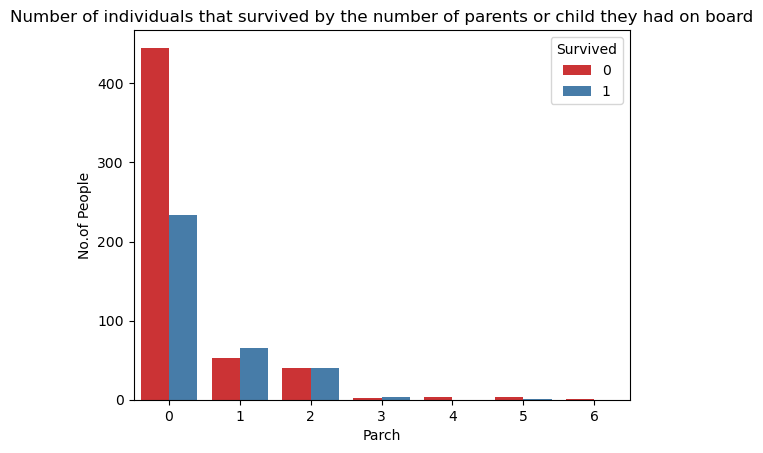

In [17]:
axis = sns.countplot(x = "Parch", hue = "Survived", palette = "Set1", data = train_df )
axis.set(title = "Number of individuals that survived by the number of parents or child they had on board", xlabel = "Parch",ylabel = "No.of People")
plt.show()

Review shows individuals with 3 parents/children relationship had a higher chance of survival. \
However, more individuals with no parent child relationship survived.


In [18]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


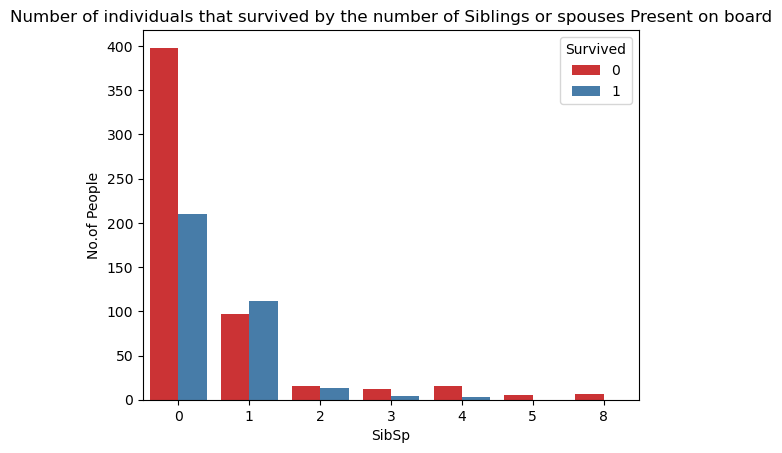

In [19]:
axis = sns.countplot(x = "SibSp", hue = "Survived", palette = "Set1", data = train_df )
axis.set(title = "Number of individuals that survived by the number of Siblings or spouses Present on board", xlabel = "SibSp",ylabel = "No.of People")
plt.show()

With a review of the chart, having just one sibling increased your chances of survival.\
Individuals with over 4 siblings had the least chance for survival.

In [20]:
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


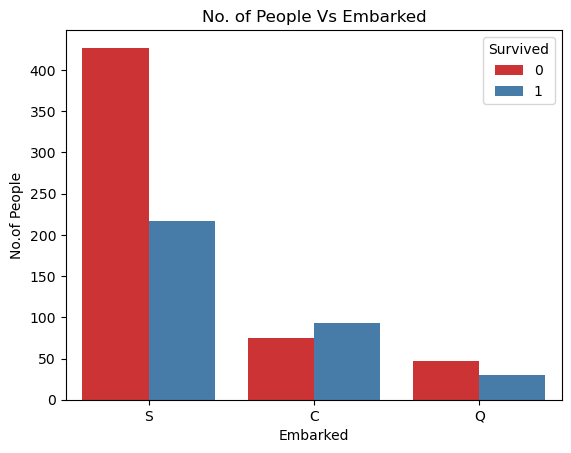

In [21]:
axis = sns.countplot(x = "Embarked", hue = "Survived", palette = "Set1", data = train_df )
axis.set(title = "No. of People Vs Embarked", xlabel = "Embarked",ylabel = "No.of People")
plt.show()

## Data Wrangling

In [22]:
combine = [train_df, test_df]

In [23]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


##### Encoding the column Titles

In [24]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [25]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [26]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


In [27]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


In [28]:
train_df = train_df.drop(['Ticket','PassengerId', 'Cabin','Name'], axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Embarked'] = le.fit_transform(train_df['Embarked'])
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,2,1
1,1,1,1,38.0,1,0,71.2833,0,3
2,1,3,1,26.0,0,0,7.9250,2,2
3,1,1,1,35.0,1,0,53.1000,2,3
4,0,3,0,35.0,0,0,8.0500,2,1


In [30]:
train_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
Survived,1.000000,-0.338481,0.543351,-0.067814,-0.035322,0.081629,0.257307,-0.163517,0.407753
Pclass,-0.338481,1.000000,-0.131900,-0.334974,0.083081,0.018443,-0.549500,0.157112,-0.173929
Sex,0.543351,-0.131900,1.000000,-0.082949,0.114631,0.245489,0.182333,-0.104057,0.502713
Age,-0.067814,-0.334974,-0.082949,1.000000,-0.232978,-0.176486,0.093706,-0.018937,-0.094914
SibSp,-0.035322,0.083081,0.114631,-0.232978,1.000000,0.414838,0.159651,0.066654,0.269623
Parch,0.081629,0.018443,0.245489,-0.176486,0.414838,1.000000,0.216225,0.038322,0.315784
Fare,0.257307,-0.549500,0.182333,0.093706,0.159651,0.216225,1.000000,-0.221226,0.136310
Embarked,-0.163517,0.157112,-0.104057,-0.018937,0.066654,0.038322,-0.221226,1.000000,-0.058549
Title,0.407753,-0.173929,0.502713,-0.094914,0.269623,0.315784,0.136310,-0.058549,1.000000


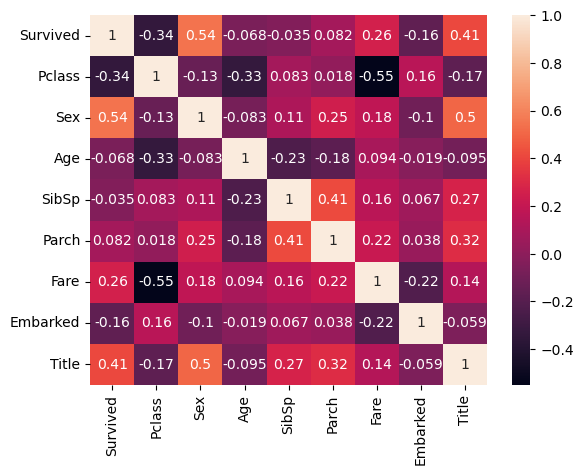

In [31]:
dataplot = sns.heatmap(train_df.corr(), annot=True)
plt.show()

## MACHINE LEARNING

Various machine learning algorithm were tested.\
The test and train score for each algorithm were reviewed along side the confusion matrix.

In [32]:
x = train_df[['Pclass','Sex','Age','SibSp','Parch','Fare', 'Embarked','Title']]
y = train_df['Survived']

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.40, random_state = 42 )

60% of the data frame was used to train the algorithm

In [34]:
headers = x.columns 


In [35]:
from sklearn.preprocessing import StandardScaler
st_scale = StandardScaler()


## transforming "train_x"
x_train = st_scale.fit_transform(x_train)
## transforming "test_x"
x_test = st_scale.transform(x_test)
pd.DataFrame(x_train,columns=headers).head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,-0.408652,-0.737125,2.529619,-0.464063,-0.468427,-0.412724,0.573494,-0.699855
1,0.803682,-0.737125,-1.638477,2.692745,0.794906,-0.066661,-0.718682,2.289924
2,0.803682,-0.737125,0.214010,-0.464063,-0.468427,0.441904,0.573494,-0.699855
3,0.803682,1.356623,-0.712233,0.325139,-0.468427,-0.425266,0.573494,0.296738
4,-0.408652,1.356623,-0.094738,-0.464063,-0.468427,-0.366273,0.573494,0.296738


In [36]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

82.21

In [37]:
coeff_df = pd.DataFrame(x.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,1.083509
7,Title,0.585333
5,Fare,0.200200
6,Embarked,-0.209967
4,Parch,-0.217366
2,Age,-0.375433
3,SibSp,-0.449426
0,Pclass,-0.669510


In [38]:
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, Y_pred))
print('*'*100)
pd.DataFrame(confusion_matrix(y_test,Y_pred),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       216
           1       0.75      0.72      0.73       141

    accuracy                           0.79       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357

****************************************************************************************************


,Predicted Not-Survived,Predicted Survived
Not-Survived,182,34
Survived,40,101


In [39]:
svc = SVC()
svc.fit(x_train, y_train)
Y_pred_svc = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

85.39

In [40]:
print(classification_report(y_test, Y_pred_svc))
print('*'*100)
pd.DataFrame(confusion_matrix(y_test,Y_pred_svc),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"])

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       216
           1       0.81      0.72      0.76       141

    accuracy                           0.82       357
   macro avg       0.82      0.80      0.81       357
weighted avg       0.82      0.82      0.82       357

****************************************************************************************************


,Predicted Not-Survived,Predicted Survived
Not-Survived,192,24
Survived,40,101


In [41]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
Y_pred_knn = knn.predict(x_test)
acc_knn_tst = round(knn.score(x_test, y_test) * 100, 2)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn


86.14

In [42]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
knn = KNeighborsClassifier(metric='minkowski', p=2)
 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)

accuracies = cross_val_score(knn, x,y, cv = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),3)))

Cross-Validation accuracy scores:[0.73991031 0.74887892 0.72197309 0.71748879 0.71300448 0.76681614
 0.71748879 0.70403587 0.7309417  0.73991031]
Mean Cross-Validation accuracy score: 0.73


In [43]:
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x,y, cv = cv, scoring = 'accuracy')
    k_scores.append(scores.mean())
print("Accuracy scores are: {}\n".format(k_scores))
print ("Mean accuracy score: {}".format(np.mean(k_scores)))

Accuracy scores are: [0.6986547085201793, 0.7040358744394619, 0.7367713004484304, 0.7161434977578476, 0.7300448430493274, 0.7192825112107625, 0.7242152466367713, 0.7067264573991031, 0.7067264573991031, 0.704932735426009, 0.7103139013452915, 0.704932735426009, 0.7103139013452915, 0.7049327354260091, 0.7156950672645739, 0.7121076233183856, 0.7161434977578476, 0.7143497757847534, 0.7143497757847534, 0.7098654708520179, 0.7067264573991032, 0.705829596412556, 0.7031390134529149, 0.7040358744394618, 0.6977578475336322, 0.7004484304932735, 0.6995515695067265, 0.6982062780269058, 0.6932735426008968, 0.694170403587444]

Mean accuracy score: 0.7087892376681615


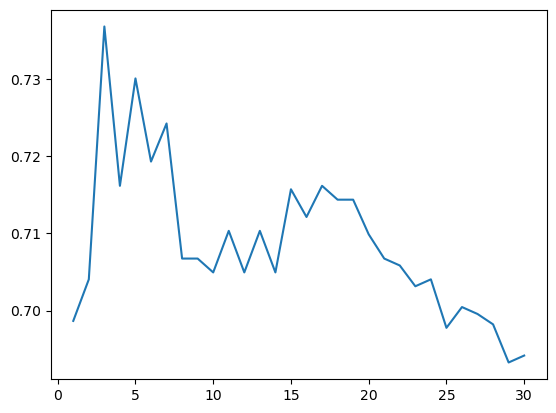

In [44]:
from matplotlib import pyplot as plt
plt.plot(k_range, k_scores)

In [45]:
k_range = range(1,31)

weights_options=['uniform','distance']

param = {'n_neighbors':k_range, 'weights':weights_options}

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
grid = GridSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1)
## Fitting the model. 
grid.fit(x,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             verbose=False)

In [46]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7324626865671642
{'n_neighbors': 5, 'weights': 'uniform'}
KNeighborsClassifier()


In [47]:
knn_grid= grid.best_estimator_
knn_grid.score(x,y)

0.8282828282828283

In [48]:
print(classification_report(y_test, Y_pred_knn))
print('*'*100)
pd.DataFrame(confusion_matrix(y_test,Y_pred_knn),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"])

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       216
           1       0.80      0.71      0.75       141

    accuracy                           0.82       357
   macro avg       0.81      0.80      0.80       357
weighted avg       0.81      0.82      0.81       357

****************************************************************************************************


,Predicted Not-Survived,Predicted Survived
Not-Survived,191,25
Survived,41,100


In [49]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred_gs = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

80.9

In [50]:
print(classification_report(y_test, Y_pred_gs))
print('*'*100)
pd.DataFrame(confusion_matrix(y_test,Y_pred_gs),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"])

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       216
           1       0.72      0.78      0.75       141

    accuracy                           0.79       357
   macro avg       0.78      0.79      0.79       357
weighted avg       0.80      0.79      0.79       357

****************************************************************************************************


,Predicted Not-Survived,Predicted Survived
Not-Survived,173,43
Survived,31,110


In [51]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred_dt = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

97.94

In [52]:
print(classification_report(y_test, Y_pred_dt))
print('*'*100)
pd.DataFrame(confusion_matrix(y_test,Y_pred_dt),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"])

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       216
           1       0.66      0.67      0.66       141

    accuracy                           0.73       357
   macro avg       0.72      0.72      0.72       357
weighted avg       0.73      0.73      0.73       357

****************************************************************************************************


,Predicted Not-Survived,Predicted Survived
Not-Survived,167,49
Survived,47,94


In [53]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred_rf = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

97.94

In [54]:
print(classification_report(y_test, Y_pred_rf))
print('*'*100)
pd.DataFrame(confusion_matrix(y_test,Y_pred_rf),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"])

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       216
           1       0.74      0.72      0.73       141

    accuracy                           0.79       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357

****************************************************************************************************


,Predicted Not-Survived,Predicted Survived
Not-Survived,181,35
Survived,40,101


In [55]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
Y_pred_sgd = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
acc_sgd

78.09

In [56]:
print(classification_report(y_test, Y_pred_sgd))
print('*'*100)
pd.DataFrame(confusion_matrix(y_test,Y_pred_sgd),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"])

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       216
           1       0.73      0.65      0.69       141

    accuracy                           0.77       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.77      0.77      0.76       357

****************************************************************************************************


,Predicted Not-Survived,Predicted Survived
Not-Survived,183,33
Survived,50,91


In [57]:
acc_log_tst = round(logreg.score(x_test, y_test) * 100, 2)
acc_svc_tst = round(svc.score(x_test, y_test) * 100, 2)
acc_gaussian_tst = round(gaussian.score(x_test, y_test) * 100, 2)
acc_decision_tree_tst = round(decision_tree.score(x_test, y_test) * 100, 2)
acc_random_forest_tst = round(random_forest.score(x_test, y_test) * 100, 2)
acc_sgd_tst = round(sgd.score(x_test, y_test) * 100, 2)

In [58]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent',
              'Decision Tree'],
    'Train Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_decision_tree],
    'Test Score': [acc_svc_tst, acc_knn_tst, acc_log_tst, 
              acc_random_forest_tst, acc_gaussian_tst, 
              acc_sgd_tst, acc_decision_tree_tst]})
models.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score
0,Support Vector Machines,85.39,82.07
1,KNN,86.14,81.51
2,Logistic Regression,82.21,79.27
4,Naive Bayes,80.90,79.27
3,Random Forest,97.94,78.99
5,Stochastic Gradient Decent,78.09,76.75
6,Decision Tree,97.94,73.11


In [59]:
len(x_train)


534

In [60]:
len(x_test)

357

In [61]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,3
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,3


In [62]:
test_df1 = test_df.drop(['Ticket','PassengerId', 'Cabin','Name'], axis=1)
test_df1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,Q,1
1,3,1,47.0,1,0,7.0000,S,3
2,2,0,62.0,0,0,9.6875,Q,1
3,3,0,27.0,0,0,8.6625,S,1
4,3,1,22.0,1,1,12.2875,S,3


In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_df1['Embarked'] = le.fit_transform(test_df['Embarked'])
test_df1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,1,1
1,3,1,47.0,1,0,7.0000,2,3
2,2,0,62.0,0,0,9.6875,1,1
3,3,0,27.0,0,0,8.6625,2,1
4,3,1,22.0,1,1,12.2875,2,3


In [64]:
test_x = st_scale.transform(test_df1)
pd.DataFrame(test_x,columns=headers).head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.803682,-0.737125,0.406978,-0.464063,-0.468427,-0.462349,-0.718682,-0.699855
1,0.803682,1.356623,1.371815,0.325139,-0.468427,-0.477756,0.573494,1.293331
2,-0.408652,-0.737125,2.529619,-0.464063,-0.468427,-0.427821,-0.718682,-0.699855
3,0.803682,-0.737125,-0.171925,-0.464063,-0.468427,-0.446866,0.573494,-0.699855
4,0.803682,1.356623,-0.557859,0.325139,0.794906,-0.379512,0.573494,1.293331


In [65]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
World_Y = knn.predict(test_x)
World_Y

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [66]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": World_Y
    })
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [67]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [68]:
submission.to_csv("Titanic_submission.csv", index=False)